In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_X = np.linspace(-1,1,100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3

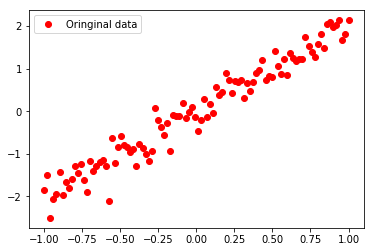

In [6]:
# ro: red circle
plt.plot(train_X, train_Y, 'ro', label = 'Oringinal data')
plt.legend()
plt.show()

### create model, one hidden neuron 

In [15]:
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(tf.random_normal([1]), name = "Weight")
b = tf.Variable(tf.zeros([1]), name = "bias")
Z = tf.multiply(X,W)+b

In [16]:
cost = tf.reduce_mean(tf.square(Y-Z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### train the model 

In [19]:
plotdata = {"batchsize":[], "loss":[]}
def moving_average(a, w=10):
    if len(a)<w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

Epoch: 1 cost= 0.09470084 W= [1.8007892] b= [0.0734661]
Epoch: 3 cost= 0.07403508 W= [1.9726664] b= [0.02801236]
Epoch: 5 cost= 0.07251703 W= [2.0193384] b= [0.01044721]
Epoch: 7 cost= 0.07246584 W= [2.0314438] b= [0.00580762]
Epoch: 9 cost= 0.07247581 W= [2.034574] b= [0.00460658]
Epoch: 11 cost= 0.072479956 W= [2.035384] b= [0.00429583]
Epoch: 13 cost= 0.07248113 W= [2.035594] b= [0.00421526]
Epoch: 15 cost= 0.072481446 W= [2.035648] b= [0.00419435]
Epoch: 17 cost= 0.07248152 W= [2.035662] b= [0.00418914]
Epoch: 19 cost= 0.072481535 W= [2.0356646] b= [0.00418809]
 Finished!
cost= 0.07248154 W= [2.0356653] b= [0.00418781]


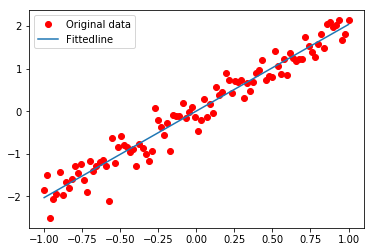

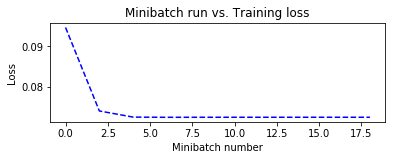

x=0.3, z= [0.6148874]


In [23]:
init = tf.global_variables_initializer()

training_epochs = 20
display_step = 2

with tf.Session() as sess:
    sess.run(init)
    plotdata = {"batchsize":[], "loss":[]}
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X:x, Y:y})
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict = {X: train_X, Y: train_Y})
            print("Epoch:", epoch+1, "cost=", loss, "W=", sess.run(W), "b=", sess.run(b))
            if not (loss == "NA"):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)
    print(" Finished!")
    print("cost=", sess.run(cost, feed_dict = {X: train_X, Y: train_Y}), "W=", sess.run(W), "b=", sess.run(b))
    
    plt.plot(train_X, train_Y, 'ro', label = 'Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label = 'Fittedline')
    plt.legend()
    plt.show()
    
    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')
    
    plt.show()
    
    print("x=0.3, z=", sess.run(Z, feed_dict={X:0.3}))